In [1]:
library(glmmSeq)
setwd('/lustre/scratch117/cellgen/team297/kt16/COVID_imperial_renal/')

Registered S3 methods overwritten by 'lme4':
  method                          from
  cooks.distance.influence.merMod car 
  influence.merMod                car 
  dfbeta.influence.merMod         car 
  dfbetas.influence.merMod        car 



In [2]:
load('h5ad/glmmSeq_B_ASC_all.RData')
ls()

[1] "results1" "results2" "results3" "results4"

In [3]:
results1 <- glmmQvals(results1, pi0=1)


q_case_control
--------------
Not Significant     Significant 
           5291            4679 

q_sex
-----
Not Significant     Significant 
           8998             972 

q_ethnicity
-----------
Not Significant     Significant 
           8865            1105 

q_calc_age
----------
Not Significant     Significant 
           9534             436 


In [4]:
results2 <- glmmQvals(results2, pi0=1)


q_case_control
--------------
Not Significant     Significant 
           4481            5489 

q_sex
-----
Not Significant     Significant 
           8785            1185 

q_ethnicity
-----------
Not Significant     Significant 
           8749            1221 

q_calc_age
----------
Not Significant     Significant 
           9380             590 

q_days_to_admission
-------------------
Not Significant     Significant 
           8875            1095 


In [5]:
results3 <- glmmQvals(results3, pi0=1)


q_WHO_severity
--------------
Not Significant     Significant 
           1130            8840 

q_sex
-----
Not Significant     Significant 
           8862            1108 

q_ethnicity
-----------
Not Significant     Significant 
           8756            1214 

q_calc_age
----------
Not Significant     Significant 
           9536             434 


In [6]:
results4 <- glmmQvals(results4, pi0=1)


q_WHO_severity
--------------
Not Significant     Significant 
            636            9334 

q_sex
-----
Not Significant     Significant 
           8827            1143 

q_ethnicity
-----------
Not Significant     Significant 
           8733            1237 

q_calc_age
----------
Not Significant     Significant 
           9476             494 

q_days_to_admission
-------------------
Not Significant     Significant 
           8396            1574 


In [10]:
degTable <- function(results, contrast, group){    
    modelData <- results@modelData
    outLabels <- apply(modelData, 1, function(x) paste(x, collapse="_"))
    modelData$y <- paste0('y_', outLabels)
    cols1 = grep(group, modelData$y, value = TRUE)
    cols2 = grep(group, modelData$y, value = TRUE, invert = TRUE)
    LFC <- log2(rowMeans(results@predict[, cols1])+1) - log2(rowMeans(results@predict[, cols2])+1)
    tmp <- data.frame(results@stats[,c(paste0(contrast, group), paste0('P_',contrast), paste0('q_',contrast))])
    colnames(tmp) <- c('fixed-effects estimates', 'pval', 'qval')
    tmp$LFC <- LFC
    tmp <- tmp[order(-tmp$`fixed-effects estimates`, tmp$qval), ]
    return(tmp)
}

In [24]:
res1 <- degTable(results1, 'case_control', 'POSITIVE')
head(res1)

,fixed-effects estimates,pval,qval,LFC
,<dbl>,<dbl>,<dbl>,<dbl>
TMED5,2.157676,1.876799e-11,1.811393e-10,1.645022
SRSF9,2.123304,1.170271e-16,1.243881e-15,1.519496
NDUFA12,2.098023,1.295392e-12,1.301922e-11,1.818110
HM13,2.088680,3.858901e-11,3.688710e-10,1.767537
SSR3,2.073148,7.761194e-16,8.170972e-15,1.695220
ATP6V0B,2.037531,3.762476e-12,3.714048e-11,1.681106


In [25]:
res2 <- degTable(results1, 'case_control', 'RECOVERY')
head(res2)

,fixed-effects estimates,pval,qval,LFC
,<dbl>,<dbl>,<dbl>,<dbl>
ADIPOR1,1.696190,6.679787e-05,3.277435e-04,0.75859098
SRSF9,1.565479,1.170271e-16,1.243881e-15,0.03196005
ABHD5,1.560959,2.478209e-02,5.230260e-02,1.05453950
SRPRA,1.537723,1.135702e-09,1.010978e-08,0.16781532
CES1,1.526080,4.142168e-02,7.869200e-02,1.77024547
TMED5,1.490394,1.876799e-11,1.811393e-10,-0.11873613


In [26]:
library(dplyr)
makeGeneList <- function(gl){
    y <- grepl('^RPS|^RPL|^MT-', row.names(gl))
    gl <- gl[!y, ]
    rank <- -log10(gl$pval) * sign(gl$LFC)
    rank[which(rank == Inf)] <- 300
    rank[which(rank == -Inf)] <- 300
    names(rank) <- row.names(gl)
    rank <- rev(sort(rank))
    gl <- rank
    return(gl)
}

In [27]:
gl1 <- makeGeneList(res1)
gl2 <- makeGeneList(res2)

In [28]:
library(fgsea)
library(msigdbr)

In [29]:
h <- data.frame(msigdbr::msigdbr(category = "H", species = 'Homo sapiens'))
h <- split(h, h$gs_name)
h <- lapply(h, function(x) x %>% dplyr::select(gene_symbol) %>% unlist %>% as.character)

In [30]:
res1gsea <- fgsea(pathways = h, stats = gl1, minSize = 0, maxSize =1000)

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (8.6% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”


In [31]:
res2gsea <- fgsea(pathways = h, stats = gl2, minSize = 0, maxSize =1000)

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (8.6% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”


In [32]:
res1gsea

pathway,pval,padj,log2err,ES,NES,size,leadingEdge
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<list>
HALLMARK_ADIPOGENESIS,9.130869e-01,1.000000e+00,0.014075742,0.8132326,0.9614246,145,"PDCD4 , POR , SLC5A6 , GBE1 , ELMOD3 , PPP1R15B, GPHN , QDPR , ETFB , ATP5PO , COQ9 , NDUFB7 , REEP5 , COX6A1 , SOD1 , COX7B , GHITM"
HALLMARK_ALLOGRAFT_REJECTION,4.155844e-01,7.165249e-01,0.054120057,0.8562049,1.0114733,119,"IL2RB , IL27RA, GZMA , ICAM1 , IRF7 , AKT1 , CCND3 , MTIF2 , ABCE1 , NME1 , CD8A , PRKCB , B2M , SRGN"
HALLMARK_ANDROGEN_RESPONSE,8.531469e-01,1.000000e+00,0.018928789,0.8158189,0.9637505,68,"PDLIM5 , AKT1 , CCND3 , APPBP2 , UAP1 , UBE2J1 , B2M , SPCS3 , TMEM50A, LMAN1"
HALLMARK_ANGIOGENESIS,6.524184e-01,9.211915e-01,0.038875879,0.5295703,0.7540789,7,"LRPAP1, VEGFA , APP , CCND2"
HALLMARK_APICAL_JUNCTION,4.695305e-01,7.590133e-01,0.048505984,0.8561215,1.0106368,86,"ICAM1 , STX4 , MAPK14, PBX2 , ACTN4 , TUBG1 , ARPC2"
HALLMARK_APICAL_SURFACE,1.239001e-03,3.097503e-02,0.455059867,0.9600792,1.2437007,15,"IL2RB, FLOT2, IL2RG"
HALLMARK_APOPTOSIS,3.606394e-01,6.493506e-01,0.060771945,0.8596401,1.0154996,112,"CDKN1A, PDCD4 , GCH1 , ANXA1 , HMGB2 , SC5D , RHOB , CREBBP, TOP2A , CASP7 , NEDD9 , PLCB2 , HMOX1 , BCAP31, SOD1"
HALLMARK_BILE_ACID_METABOLISM,3.626374e-01,6.493506e-01,0.060509299,0.8691027,1.0293667,55,"PECR , CROT , ABCD1 , OPTN , PEX12 , HACL1 , SLC27A5, PRDX5 , SOD1"
HALLMARK_CHOLESTEROL_HOMEOSTASIS,5.694306e-02,2.372627e-01,0.186432558,0.8920396,1.0568935,53,"TRIB3, SC5D , PCYT2, FDPS"


In [37]:
plotGSEA_Hallmark <- function(gsea, cols = NULL, xlim = NULL, newlabels = NULL, keep_significant_only = TRUE, jitter = FALSE) {
    require(ggplot2)
    gsea$NES[which(is.na(gsea$NES))] <- 0
    gsea$pval[which(is.na(gsea$pval))] <- 1
    gsea$padj[which(is.na(gsea$padj))] <- 1
    gsea$ranking[which(is.na(gsea$ranking))] <- 0
    gsea <- gsea[order(gsea$ranking),]
    
    if (keep_significant_only){
        gseax <- split(gsea, gsea$pathway)
        for (i in 1:length(gseax)){
            if (all(gseax[[i]]$pval >= 0.05)|all(gseax[[i]]$padj >=0.25)){
                gseax[[i]] <- NA        
            }
        }
        gseax <- gseax[!is.na(gseax)]
        gsea <- do.call(rbind, gseax)        
    }
    if (!is.null(gsea)){
        gsea <- gsea[order(gsea$ranking), ]
        gsea$pathway <- gsub("HALLMARK_|", "", gsea$pathway)

        if (!is.null(xlim)){
            x_lim_min = -xlim
            x_lim_max = xlim
        } else {
            x_lim_min <- abs(ceiling(min(-log10(gsea$padj))))
            x_lim_max <- abs(ceiling(max(-log10(gsea$padj))))
        }
        
        if(x_lim_min > x_lim_max){
            xval1 <- x_lim_min * -1
            xval2 <- x_lim_min
        } else {
            xval1 <- x_lim_max * -1
            xval2 <- x_lim_max
        }

        if(!is.null(cols)){
            gg_color_hue <- function(n) {
                hues = seq(15, 375, length = n + 1)
                hcl(h = hues, l = 65, c = 100)[1:n]
            }
            cols. = gg_color_hue(dplyr::n_distinct(gsea$group, na.rm = TRUE))
        } else {
            cols. = cols
        }    
    
        g <- ggplot(gsea, aes(x = -log10(padj)*sign(NES), y = reorder(pathway, ranking), col = -log10(padj)*sign(NES), size = abs(NES)))
        if (jitter){
            g <- g + geom_point(position = 'jitter')
        }else{
            g <- g + geom_point()
        }
        g <- g + theme_bw() +
            labs(x = expression(paste("Signed", " -log" ["10"], "adjusted pval")), y = "Hallmarks") +
            geom_vline(xintercept = 0) +
            geom_vline(xintercept = -log10(0.25)) +
            geom_vline(xintercept = -log10(0.25)*-1) +
            scale_x_continuous(limits = c(xval1, xval2), oob = scales::squish) +
            scale_size_area(oob = scales::squish, max_size = 3, limits = c(0,2)) +
            theme(panel.grid.major = element_blank(), 
                panel.grid.minor = element_blank(), 
                panel.background = element_blank(), 
                axis.line = element_blank(), 
                axis.ticks = element_blank(),
                axis.text = element_text(color = 'black'),
                axis.title = element_text(color = 'black'))
        
        return(g)
    }
}

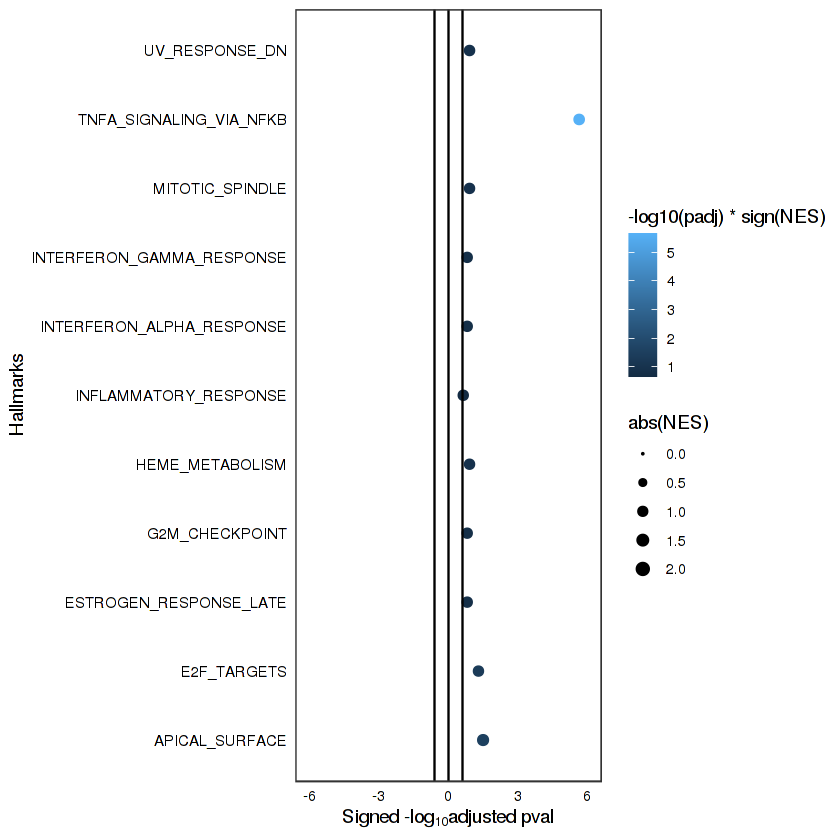

In [38]:
plotGSEA_Hallmark(res1gsea)

In [40]:
res1gsea[res1gsea$pathway == '']

pathway,pval,padj,log2err,ES,NES,size,leadingEdge
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<list>
HALLMARK_ADIPOGENESIS,9.130869e-01,1.000000e+00,0.014075742,0.8132326,0.9614246,145,"PDCD4 , POR , SLC5A6 , GBE1 , ELMOD3 , PPP1R15B, GPHN , QDPR , ETFB , ATP5PO , COQ9 , NDUFB7 , REEP5 , COX6A1 , SOD1 , COX7B , GHITM"
HALLMARK_ALLOGRAFT_REJECTION,4.155844e-01,7.165249e-01,0.054120057,0.8562049,1.0114733,119,"IL2RB , IL27RA, GZMA , ICAM1 , IRF7 , AKT1 , CCND3 , MTIF2 , ABCE1 , NME1 , CD8A , PRKCB , B2M , SRGN"
HALLMARK_ANDROGEN_RESPONSE,8.531469e-01,1.000000e+00,0.018928789,0.8158189,0.9637505,68,"PDLIM5 , AKT1 , CCND3 , APPBP2 , UAP1 , UBE2J1 , B2M , SPCS3 , TMEM50A, LMAN1"
HALLMARK_ANGIOGENESIS,6.524184e-01,9.211915e-01,0.038875879,0.5295703,0.7540789,7,"LRPAP1, VEGFA , APP , CCND2"
HALLMARK_APICAL_JUNCTION,4.695305e-01,7.590133e-01,0.048505984,0.8561215,1.0106368,86,"ICAM1 , STX4 , MAPK14, PBX2 , ACTN4 , TUBG1 , ARPC2"
HALLMARK_APICAL_SURFACE,1.239001e-03,3.097503e-02,0.455059867,0.9600792,1.2437007,15,"IL2RB, FLOT2, IL2RG"
HALLMARK_APOPTOSIS,3.606394e-01,6.493506e-01,0.060771945,0.8596401,1.0154996,112,"CDKN1A, PDCD4 , GCH1 , ANXA1 , HMGB2 , SC5D , RHOB , CREBBP, TOP2A , CASP7 , NEDD9 , PLCB2 , HMOX1 , BCAP31, SOD1"
HALLMARK_BILE_ACID_METABOLISM,3.626374e-01,6.493506e-01,0.060509299,0.8691027,1.0293667,55,"PECR , CROT , ABCD1 , OPTN , PEX12 , HACL1 , SLC27A5, PRDX5 , SOD1"
HALLMARK_CHOLESTEROL_HOMEOSTASIS,5.694306e-02,2.372627e-01,0.186432558,0.8920396,1.0568935,53,"TRIB3, SC5D , PCYT2, FDPS"


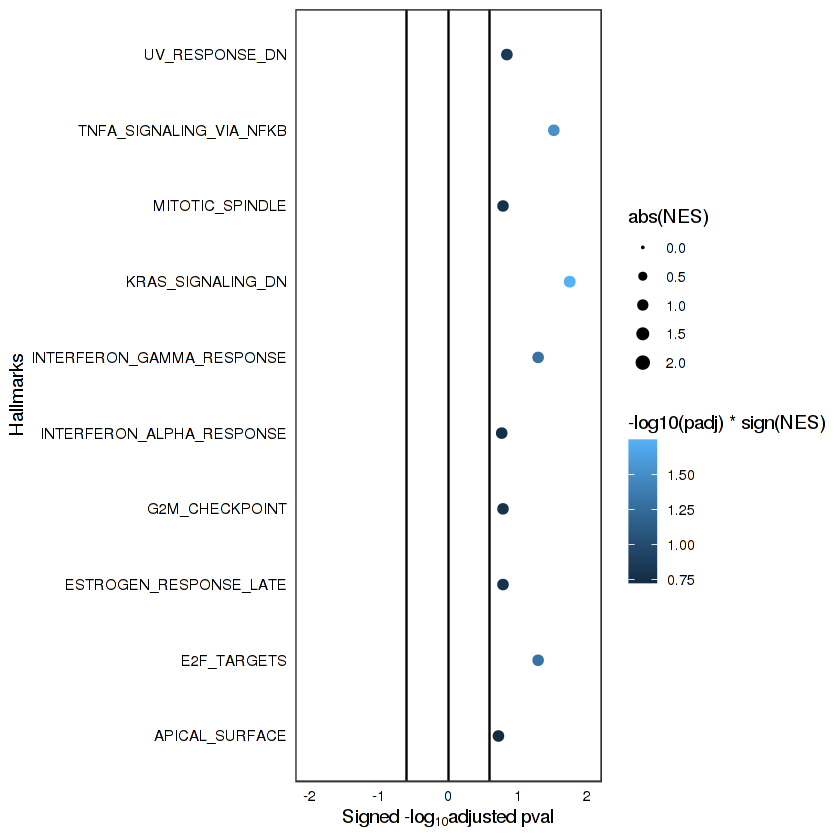

In [39]:
plotGSEA_Hallmark(res2gsea)